Data Import

In [ ]:
import pandas as pd

df = pd.read_csv('housing.csv')
df.head()

# in order for it to be a true model, you need to pull from a live database, not a csv

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,181500.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,223500.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,140000.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,250000.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Univariate Understanding

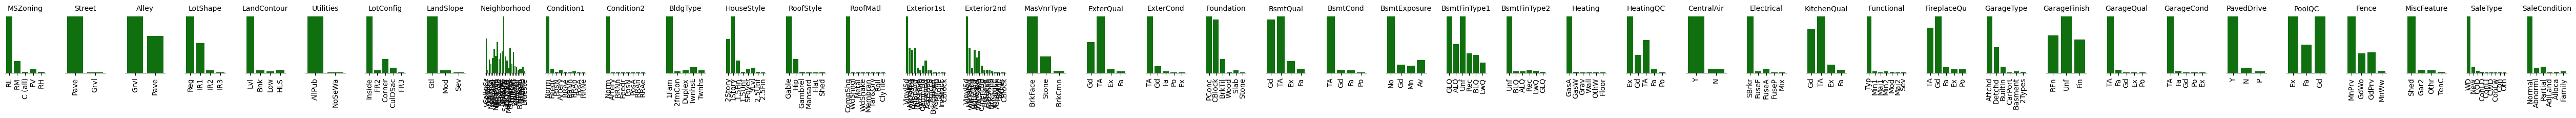

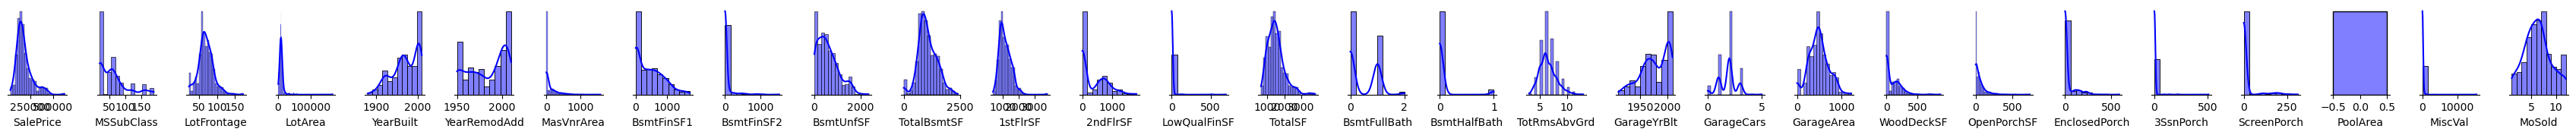

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
SalePrice,-,float64,1459,663,34900.0,163000.0,755000.0,140000.0,180921.2,79442.5,1.88
MSSubClass,-,int64,0,16,20.0,50.0,190.0,20.0,57.14,42.52,1.38
MSZoning,3,object,4,5,-,-,-,RL,-,-,-
LotFrontage,-,float64,486,128,21.0,68.0,313.0,60.0,69.31,23.34,1.5
LotArea,-,int64,0,1951,1300,9453.0,215245,9600,10168.11,7887.0,12.83
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-,int64,0,38,0,0.0,17000,0,50.83,567.4,21.96
MoSold,-,int64,0,12,1,6.0,12,6,6.21,2.71,0.2
YrSold,-,int64,0,5,2006,2008.0,2010,2007,2007.79,1.31,0.13
SaleType,7,object,1,9,-,-,-,WD,-,-,-


In [2]:
def univariate(df, sample=500):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import math

    df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                        'median', 'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
        # Features that apply to all dtypes
        dtype = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        mode = df[col].mode()[0]
        if pd.api.types.is_numeric_dtype(df[col]):
            # Features for numeric dtypes only
            min = df[col].min()
            max = df[col].max()
            mean = df[col].mean()
            median = df[col].median()
            std = df[col].std()
            skew = df[col].skew()
            df_results.loc[col] = ['-', dtype, missing, unique, min, median, max, mode,
                                    round(mean, 2), round(std, 2), round(skew, 2)]
        else:
            # Features for object dtypes only
            flag = df[col].value_counts()[(df[col].value_counts() / df.shape[0]) < 0.05].shape[0]
            df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

    # Make a sub-DataFrame of features that are objects or have only two values; they will need countplots
    countplots = df_results[(df_results['type']=='object') | (df_results['unique']==2)]
    # Make a sub-DataFrame of features that are floats or ints with many values which will need histograms
    histograms = df_results[(df_results['type']=='float64') | ((df_results['unique']>10) & (df_results['type']=='int64'))]
    histograms = histograms[histograms['unique']>2] # Remove those that are binary

    # Create a set of countplots for the categorical features
    f, ax = plt.subplots(1, countplots.shape[0], figsize=[countplots.shape[0] * 1.5, 1.5])
    for i, col in enumerate(countplots.index):
        g = sns.countplot(data=df, x=col, color='g', ax=ax[i]);
        g.set_yticklabels('')
        g.set_ylabel('')
        ax[i].tick_params(labelrotation=90, left=False)
        ax[i].xaxis.set_label_position('top')
        sns.despine(left=True, top=True, right=True)

    plt.subplots_adjust(hspace=2, wspace=.5)
    plt.show()

    # Create a set of histograms for the numeric features
    f, ax = plt.subplots(1, histograms.shape[0], figsize=[histograms.shape[0] * 1.5, 1.5])
    for i, col in enumerate(histograms.index):
        g = sns.histplot(data=df.sample(n=sample, random_state=1), x=col, color='b', ax=ax[i], kde=True);
        g.set_yticklabels(labels=[])
        g.set_ylabel('')
        ax[i].tick_params(left=False)
        sns.despine(left=True, top=True, right=True)

    plt.subplots_adjust(hspace=2, wspace=.5)
    plt.show()

    return df_results

univariate(df)

Data Preparation
1. address missing data
2. Math transform SalePrice to normal

MSZoning has been binned by setting Index(['FV', 'RH', 'C (all)'], dtype='object', name='MSZoning') to Other
Street has been binned by setting Index(['Grvl'], dtype='object', name='Street') to Other
Alley has been binned by setting Index(['Grvl', 'Pave'], dtype='object', name='Alley') to Other
LotShape has been binned by setting Index(['IR2', 'IR3'], dtype='object', name='LotShape') to Other
LandContour has been binned by setting Index(['HLS', 'Bnk', 'Low'], dtype='object', name='LandContour') to Other
Utilities has been binned by setting Index(['NoSeWa'], dtype='object', name='Utilities') to Other
LotConfig has been binned by setting Index(['FR2', 'FR3'], dtype='object', name='LotConfig') to Other
LandSlope has been binned by setting Index(['Mod', 'Sev'], dtype='object', name='LandSlope') to Other
Neighborhood has been binned by setting Index(['NWAmes', 'SawyerW', 'Mitchel', 'BrkSide', 'Crawfor', 'IDOTRR',
       'Timber', 'NoRidge', 'StoneBr', 'SWISU', 'ClearCr', 'MeadowV', 'BrDale',

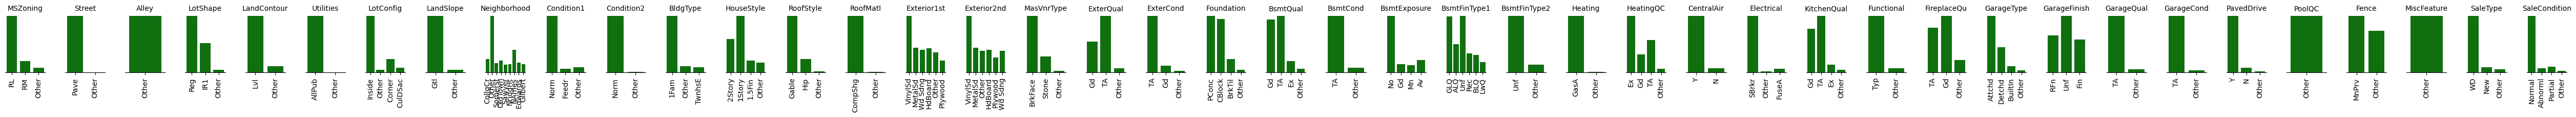

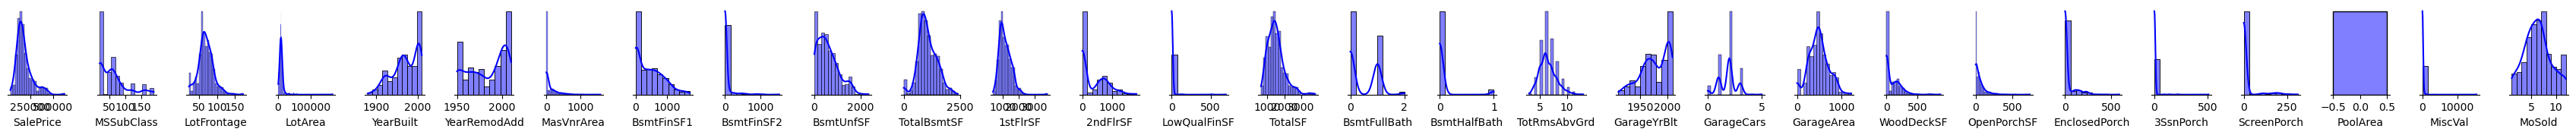

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
SalePrice,-,float64,1459,663,34900.0,163000.0,755000.0,140000.0,180921.2,79442.5,1.88
MSSubClass,-,int64,0,16,20.0,50.0,190.0,20.0,57.14,42.52,1.38
MSZoning,0,object,4,3,-,-,-,RL,-,-,-
LotFrontage,-,float64,486,128,21.0,68.0,313.0,60.0,69.31,23.34,1.5
LotArea,-,int64,0,1951,1300,9453.0,215245,9600,10168.11,7887.0,12.83
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-,int64,0,38,0,0.0,17000,0,50.83,567.4,21.96
MoSold,-,int64,0,12,1,6.0,12,6,6.21,2.71,0.2
YrSold,-,int64,0,5,2006,2008.0,2010,2007,2007.79,1.31,0.13
SaleType,0,object,1,3,-,-,-,WD,-,-,-


In [3]:
def bin_groups(df, features=[], cutoff=0.05, replace_with='Other', messages=True):
    import pandas as pd
        
    if len(features) == 0: features = df.columns # If no features are specified, bin all features

    for feat in features:
        if feat in df.columns:  # Make sure they don't accidentally enter a feature name that doesn't exist
            if not pd.api.types.is_numeric_dtype(df[feat]):
                other_list = df[feat].value_counts()[df[feat].value_counts() / df.shape[0] < cutoff].index
                if len(other_list) > 0:
                    df.loc[df[feat].isin(other_list), feat] = replace_with
                    if messages and len(other_list) > 0: print(f'{feat} has been binned by setting {other_list} to {replace_with}')
        else:
            if messages: print(f'{feat} not found in the DataFrame provided. No binning performed')

    return df

df = bin_groups(df)
univariate(df)

In [4]:
def missing_drop(df, label, row_thresh=0.7, col_thresh=0.9, drop_all=False):
    # Drop any row that has a missing label
    df.dropna(axis='rows', subset=[label], inplace=True)

    # Drop rows and columns have are 100% missing
    df.dropna(axis='columns', thresh=1, inplace=True)
    df.dropna(axis='rows', thresh=1, inplace=True)

    # Drop rows and columns that are below the thresholds
    df.dropna(axis='columns', thresh=round(df.shape[0] * row_thresh), inplace=True)
    df.dropna(axis='rows', thresh=round(df.shape[1] * col_thresh), inplace=True)

    # If you don't want to leave anything behind to impute:
    if drop_all:
        df.dropna(axis='rows', inplace=True)

    return df

df = missing_drop(df, 'SalePrice')
df.dropna(inplace=True)
print(df.shape)

(1094, 74)


Data Understanding: Bivariate (skip because it isn't important. Modeling will be much better at predicting the most important features)

Modeling
* Linear Model
* Decision Tree Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = df['SalePrice']
X = pd.get_dummies(df.drop(columns=['SalePrice']), drop_first=True)
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Other,PavedDrive_Y,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
457,0.235294,0.181507,0.044998,0.750,0.428571,0.961538,0.916667,0.175,0.096740,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
386,0.000000,0.184932,0.030671,0.500,0.428571,0.992308,0.983333,0.000,0.004784,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
453,0.294118,0.133562,0.010750,0.500,0.714286,0.230769,0.716667,0.000,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.625,0.428571,0.269231,0.333333,0.000,0.038271,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
354,0.235294,0.243151,0.049788,0.625,0.571429,0.746154,0.450000,0.000,0.000000,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [17]:
from sklearn.linear_model import LinearRegression, LassoLarsCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

model_lr = LinearRegression().fit(X_train, y_train)
model_ll = LassoLarsCV(max_iter=50).fit(X_train, y_train)
model_ri = RidgeCV().fit(X_train, y_train)
model_dt = DecisionTreeRegressor().fit(X_train, y_train)
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
model_ab = AdaBoostRegressor().fit(X_train, y_train)
model_rf = RandomForestRegressor().fit(X_train, y_train)
# model_nn = MLPRegressor(max_iter=10000).fit(X_train, y_train) # takes forever


In [18]:
print(model_lr.score(X_test, y_test))
print(model_ll.score(X_test, y_test))
print(model_ri.score(X_test, y_test))
print(model_dt.score(X_test, y_test))
print(model_gb.score(X_test, y_test))
print(model_ab.score(X_test, y_test))
print(model_rf.score(X_test, y_test))
# print(model_nn.score(X_test, y_test))

0.8471814804562525
0.8497469871330613
0.8541212020118898
0.7484186213631245
0.8935767623593495
0.8266132295254311
0.8789922920367634


In [19]:
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from numpy import mean

cv = KFold(n_splits=5, shuffle=True, random_state=1)

print(mean(cross_val_score(model_lr, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_ll, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_ri, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_dt, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_gb, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_ab, X, y, scoring='r2', cv=cv, n_jobs=-1)))
print(mean(cross_val_score(model_rf, X, y, scoring='r2', cv=cv, n_jobs=-1)))
# print(mean(cross_val_score(model_nn, X, y, scoring='r2', cv=cv, n_jobs=-1)))

0.730081037953118
0.8004799764488556
0.7618484776802082
0.6926824242255665
0.8728606150037432
0.7933762205924353
0.844420915473324


DAY 2

In [25]:
from sklearn.inspection import permutation_importance

pd.set_option("display.max_rows", None)
df_fi = pd.DataFrame({'Coefficients': model_lr.coef_}, index=model_lr.feature_names_in_)

df_fi['sign'] = "+"
for row in df_fi.itertuples():
    if row.Coefficients < 0:
        df_fi.loc[row[0], 'sign'] = "-"
        df_fi.loc[row[0], 'Coefficients'] = df_fi.loc[row[0], 'Coefficients'] * - 1


df_fi['FI'] = model_gb.feature_importances_

                            # works with any model
pfi = permutation_importance(model_gb, X, y, n_repeats=10, scoring="r2", random_state=1, n_jobs=-1)
df_fi['PFI'] = pfi.importances_mean

df_fi.sort_values(by=['PFI'], ascending=False)

,Coefficients,sign,FI,PFI
OverallQual,92879.351382,+,4.935599e-01,2.483885e-01
TotalSF,131009.447369,+,1.151774e-01,1.080331e-01
2ndFlrSF,107712.092065,+,5.111903e-02,3.200162e-02
BsmtFinSF1,39966.608584,-,2.538970e-02,2.215995e-02
YearBuilt,13927.100147,+,2.354401e-02,2.207823e-02
TotalBsmtSF,42734.011171,-,4.443950e-02,1.813609e-02
GarageCars,57587.611641,+,7.217345e-02,1.771022e-02
OverallCond,46167.417470,+,6.956729e-03,1.451237e-02
1stFlrSF,108836.955974,+,3.910142e-02,1.350895e-02
LotArea,74174.285909,+,2.088416e-02,1.221098e-02


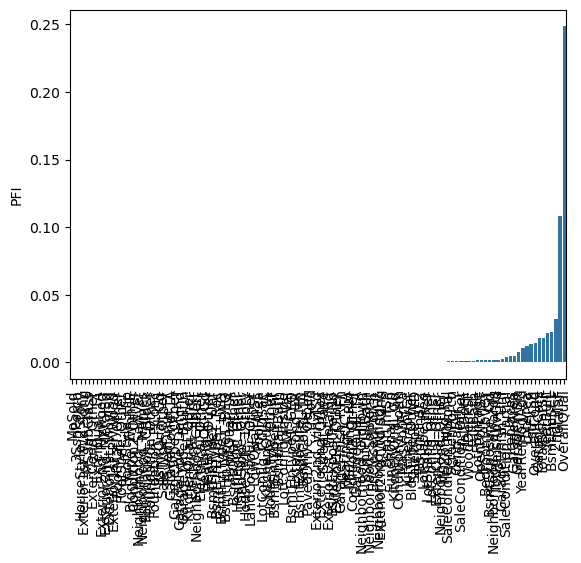

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(df_fi['PFI'].sort_values());
plt.xticks(rotation=90)
plt.show()

In [31]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(model_gb, prefit=True)
X = X[X.columns[sel.get_support()]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

model_gb.fit(X_train, y_train)


GradientBoostingRegressor()

DEPLOYMENT

In [32]:
import joblib, pickle
joblib.dump(model_gb, 'model.sav')

['model.sav']

In [33]:
# this is the web or mobile app and not a jupyter notebook file
model_loaded = joblib.load("model.sav")
model_loaded.predict([X.iloc[0]])

c:\Users\camde\miniconda3\envs\cs110\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([198892.45687974])